In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [2]:
image_paths = os.listdir('./output/images/')

In [3]:
types = []
for path in image_paths:
    path = path.split('__')[0]
    if path not in types:
        types.append(path)

In [22]:
image_paths[0]

'PickSingleYCB-v0__050_medium_clamp_39_target.png'

In [21]:
types.sort()
types

['AssemblingKits-v0',
 'LiftCube-v0',
 'MoveBucket-v1',
 'OpenCabinetDoor-v1',
 'OpenCabinetDrawer-v1',
 'PandaAvoidObstacles-v0',
 'PegInsertionSide-v0',
 'PickClutterYCB-v0',
 'PickCube-v0',
 'PickSingleEGAD-v0',
 'PickSingleYCB-v0',
 'PlugCharger-v0',
 'PushChair-v1',
 'StackCube-v0']

In [4]:
import gymnasium as gym
import mani_skill2.envs

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

[2024-02-10 23:53:57.112] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-02-10 23:53:57.112] [svulkan2] [warning] Continue without GLFW.


Action Space: Box(-1.0, 1.0, (8,), float32)
<PickCubeEnv<PickCube-v0>>


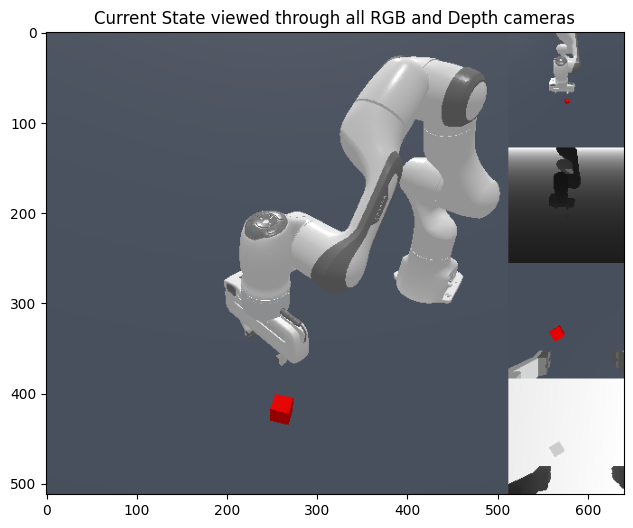

In [3]:
#@title 1.1 Choose an environment, observation mode, control mode, and reward
#@markdown Run this cell to display the action space of the chosen controller as well as the current view of the environment.
#@markdown The main part of the view is our view of the environment. The two views on the right are the RGB and Depth images from a third-person camera
#@markdown and a hand-mounted camera. The two views on the right are also the exact perspectives and orientations the robot gets in the rgbd and point cloud observation modes

# Can be any env_id from the list of Rigid-Body envs: https://haosulab.github.io/ManiSkill2/concepts/environments.html#rigid-body
# and Soft-Body envs: https://haosulab.github.io/ManiSkill2/concepts/environments.html#soft-body

# This tutorial allows you to play with 4 environments out of a total of 20 environments that ManiSkill provides
env_id = "PickCube-v0" #@param ['PickCube-v0', 'PegInsertionSide-v0', 'StackCube-v0', 'PlugCharger-v0']

# choose an observation type and space, see https://haosulab.github.io/ManiSkill2/concepts/observation.html for details
obs_mode = "rgbd" #@param can be one of ['pointcloud', 'rgbd', 'state_dict', 'state']

# choose a controller type / action space, see https://haosulab.github.io/ManiSkill2/concepts/controllers.html for a full list
control_mode = "pd_joint_delta_pos" #@param can be one of ['pd_ee_delta_pose', 'pd_ee_delta_pos', 'pd_joint_delta_pos', 'arm_pd_joint_pos_vel']

reward_mode = "dense" #@param can be one of ['sparse', 'dense']

# create an environment with our configs and then reset to a clean state
env = gym.make(env_id,
               obs_mode=obs_mode,
               reward_mode=reward_mode,
               control_mode=control_mode,
               enable_shadow=False)
obs = env.reset()
print("Action Space:", env.action_space)

# take a look at the current state
print(env.unwrapped)
img = env.unwrapped.render_cameras()

plt.figure(figsize=(10,6))
plt.title("Current State viewed through all RGB and Depth cameras")
plt.imshow(img)
env.close()

In [4]:
img.shape

(512, 640, 3)

### Download Demonstration Trajectories and Display

In [3]:
#!python -m mani_skill2.utils.download_demo {env_id} -o "demos"

34.2Mit [00:00, 51.1Mit/s]                                                      
328kit [00:00, 1.31Mit/s]                                                       


In [5]:
import glob
list_items = glob.glob("demos/v0/rigid_body/AssemblingKits-v0/*.h5")
print(list_items)

['demos/v0/rigid_body/AssemblingKits-v0/trajectory.h5']


In [6]:
env_paths = {
"rigid": {
    "AssemblingKits-v0": "demos/v0/rigid_body/AssemblingKits-v0/*.h5",
    #Insert the object into the corresponding slot on a board.
    "LiftCube-v0": "demos/v0/rigid_body/LiftCube-v0/*.h5",
    #Lift the red cube to the green spot.
    "MoveBucket-v1": "demos/v0/rigid_body/MoveBucket-v1/*/*.h5",
    #Move the bucket with a ball inside and lift it onto a platform.
    "OpenCabinetDoor-v1": "demos/v0/rigid_body/OpenCabinetDoor-v1/*/*/*.h5",
    #Open a door on the cabinet.
    "OpenCabinetDrawer-v1": "demos/v0/rigid_body/OpenCabinetDrawer-v1/*/*/*.h5",
    #Open a drawer on the cabinet.
    "PandaAvoidObstacles-v0": "demos/v0/rigid_body/PandaAvoidObstacles-v0/*.h5",
    #Navigate the robot arm through a region of dense obstacles and move the end-effector to the goal pose.
    "PegInsertionSide-v0": "demos/v0/rigid_body/PegInsertionSide-v0/*.h5",
    #Insert the peg into the horizontal hole in a box.
    "PickClutterYCB-v0": "demos/v0/rigid_body/PickClutterYCB-v0/*.h5",
    #Pick up the object in the yellow spot and move it to the green spot.
    "PickCube-v0": "demos/v0/rigid_body/PickCube-v0/*.h5",
    #Grab the object and drag it to the green spot.
    "PickSingleEGAD-v0": "demos/v0/rigid_body/PickSingleEGAD-v0/*.h5",
    #Pick up the object and move it to the green spot.
    "PickSingleYCB-v0": "demos/v0/rigid_body/PickSingleYCB-v0/*.h5",
    #Pick up the object and move it to the green spot.
    "PlugCharger-v0": "demos/v0/rigid_body/PlugCharger-v0/*.h5",
    #Plug the charger into a wall receptacle.
    "PushChair-v1": "demos/v0/rigid_body/PushChair-v1/*/*.h5",
    #Push the swivel chair to the location marked by the red hemisphere and prevent it from falling over.
    "StackCube-v0": "demos/v0/rigid_body/StackCube-v0/*.h5",
    #Pick up the red cube and place it onto a green one.
    "TurnFaucet-v0": "demos/v0/rigid_body/TurnFaucet-v0/*.h5",
    #Turn on the faucet by rotating its handle.
},
"soft": {
    "Excavate-v0": "demos/v0/soft_body/Excavate-v0/*.h5",
}
}


In [7]:
import h5py
from mani_skill2.utils.io_utils import load_json

env_id = "MoveBucket-v1" #"PickCube-v0"
# Load the trajectory data from the .h5 file. Demonstrations are versioned and thus saved to "demos/<version>/..."
env_type = "rigid"
for path in glob.glob(env_paths[env_type][env_id]):
    traj_path = path
    break
# You can also replace the above path with the trajectory you just recorded (./tmp/trajectory.h5)
h5_file = h5py.File(traj_path, "r")

# Load associated json
json_path = traj_path.replace(".h5", ".json")
json_data = load_json(json_path)

episodes = json_data["episodes"] # meta data of each episode
env_info = json_data["env_info"]
env_id = env_info["env_id"]
env_kwargs = env_info["env_kwargs"]

print("env_id:", env_id)
print("env_kwargs:", env_kwargs)
print("#episodes:", len(episodes))

env_id: MoveBucket-v1
env_kwargs: {'reward_mode': 'sparse', 'obs_mode': 'state', 'model_ids': ['4017']}
#episodes: 300


In [26]:
import h5py
from mani_skill2.utils.io_utils import load_json

total_demos = 0
env_id = "TurnFaucet-v0" #"PickCube-v0"
# Load the trajectory data from the .h5 file. Demonstrations are versioned and thus saved to "demos/<version>/..."
env_type = "rigid"
for env_id in env_paths[env_type]:
    for path in glob.glob(env_paths[env_type][env_id]):
        traj_path = path
        # You can also replace the above path with the trajectory you just recorded (./tmp/trajectory.h5)
        h5_file = h5py.File(traj_path, "r")

        # Load associated json
        json_path = traj_path.replace(".h5", ".json")
        json_data = load_json(json_path)

        episodes = json_data["episodes"] # meta data of each episode
        env_info = json_data["env_info"]
        env_id = env_info["env_id"]
        env_kwargs = env_info["env_kwargs"]

        total_demos += len(episodes)

print(total_demos)

84478


In [20]:
traj_id = "traj_0"
traj_h5 = h5_file[traj_id]
for key in traj_h5:
    print(key, traj_h5[key].shape, traj_h5[key].dtype)
    print(traj_h5[key][1])

actions (88, 8) float32
[-0.04538625  0.41972807 -0.01668118 -1.924021    0.0252337   2.3463554
  0.83562666  1.        ]
env_states (89, 73) float32
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  9.7626979e-03  4.3037873e-02  2.0000003e-02
 -3.1726176e-01 -5.9841604e-08  4.4847333e-08  9.4833803e-01
  8.1577076e-07 -1.6462948e-07 -9.3132257e-08  4.0073182e-06
  3.8435799e-05 -1.0261983e-06  8.5119329e-02 -8.5792787e-02
  6.3564651e-02  1.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -6.1500001e-01
  8.7311491e-11  0.0000000e+00  1.0000001e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -4.5366563e-02  4.1936895e-01 -1.6854482e-02 -1.9240969e

In [8]:
def replay(episode_idx, h5_file, json_data, render_mode="cameras", fps=20):
    episodes = json_data["episodes"]
    ep = episodes[episode_idx]
    print(ep)
    # episode_id should be the same as episode_idx, unless specified otherwise
    episode_id = ep["episode_id"]
    traj = h5_file[f"traj_{episode_id}"]

    # Create the environment
    env_kwargs = json_data["env_info"]["env_kwargs"]
    print(env_kwargs)
    env = gym.make(env_id, render_mode="rgb_array", **env_kwargs)
    # Reset the environment
    print(ep['reset_kwargs'])
    reset_kwargs = {}
    reset_kwargs["options"] = ep["reset_kwargs"].copy()
    reset_kwargs["seed"] = ep["episode_seed"]
    print(reset_kwargs)
    env.reset(**reset_kwargs)

    frames = [env.render()]

    for i in tqdm(range(len(traj["actions"]))):
        action = traj["actions"][i]
        obs, reward, terminated, truncated, info = env.step(action)
        #env.human_render()
        frames.append(env.render())

    env.close()
    del env
    return frames

In [44]:
json_data.keys()

dict_keys(['env_info', 'episodes'])

In [9]:
total_paths = []
for env_id in env_paths["rigid"]:
    for path in glob.glob(env_paths["rigid"][env_id]):
        total_paths.append(path)
        
print(len(total_paths))

313


In [9]:
from mani_skill2.utils.visualization.jupyter_utils import display_images
import random

episode_idx = random.sample(range(0, len(json_data['episodes'])), k=1)[0] #@param {type:"integer"}
frames = replay(episode_idx, h5_file, json_data)
#display_images(frames, format="jshtml",  repeat=True, cache_frame_data=False, interval=50)

{'episode_id': 193, 'episode_seed': 3294341718, 'reset_kwargs': {'reconfigure': True}, 'control_mode': 'base_pd_joint_vel_arm_pd_joint_vel', 'elapsed_steps': 57, 'info': {'elapsed_steps': 57, 'success': True, 'balls_in_bucket': True, 'bucket_above_platform': True, 'bucket_standing': True, 'bucket_static': True, 'dist_bucket_to_target': 0.12756413002431446, 'bucket_tilt': 0.19792940184769994, 'bucket_vel_norm': 0.24984198808670044, 'bucket_ang_vel_norm': 0.9066833257675171}}
{'reward_mode': 'sparse', 'obs_mode': 'state', 'model_ids': ['4017']}


[2024-02-27 04:10:54.213] [svulkan2] [error] GLFW error: X11: The DISPLAY environment variable is missing
[2024-02-27 04:10:54.213] [svulkan2] [warning] Continue without GLFW.


{'reconfigure': True}
{'options': {'reconfigure': True}, 'seed': 3294341718}


  0%|          | 0/57 [00:00<?, ?it/s]

### Write Video

In [10]:
import cv2
import os

video_name = 'demo_states.mp4'

images = frames[1:]
    
height, width, layers = images[0].shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 20.0, (width,height))

for image in images:
    video.write(cv2.cvtColor(image, cv2.COLOR_RGB2BGR) )

video.release()
cv2.destroyAllWindows()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [11]:
from PIL import Image
image = Image.fromarray(frames[0])
image.save('demo_states.png')

In [31]:
# Create the environment
env_kwargs = json_data["env_info"]["env_kwargs"]
print(env_kwargs)
env = gym.make(env_id, render_mode="rgb_array", **env_kwargs)
for episode_idx in range(len(episodes[20:30])):
    # Reset the environment
    episodes = json_data["episodes"]
    ep = episodes[episode_idx]
    print(ep)
    # episode_id should be the same as episode_idx, unless specified otherwise
    episode_id = ep["episode_id"]
    traj = h5_file[f"traj_{episode_id}"]
    print(ep['reset_kwargs'])
    reset_kwargs = {}
    reset_kwargs["options"] = ep["reset_kwargs"].copy()
    reset_kwargs["seed"] = ep["episode_seed"]
    print(reset_kwargs)
    env.reset(**reset_kwargs)

    frames = [env.render()]

    for i in tqdm(range(len(traj["actions"]))):
        action = traj["actions"][i]
        obs, reward, terminated, truncated, info = env.step(action)
        #env.human_render()
        frames.append(env.render())
    display_images(frames, format="jshtml",  repeat=True, cache_frame_data=False, interval=50)


env.close()
del env

In [29]:
json_data["episodes"]

[{'episode_id': 0,
  'episode_seed': 0,
  'reset_kwargs': {'seed': 0},
  'control_mode': 'pd_joint_pos',
  'elapsed_steps': 89,
  'info': {'elapsed_steps': 89,
   'is_obj_placed': True,
   'is_robot_static': True,
   'success': True}},
 {'episode_id': 1,
  'episode_seed': 1,
  'reset_kwargs': {'seed': 1},
  'control_mode': 'pd_joint_pos',
  'elapsed_steps': 84,
  'info': {'elapsed_steps': 84,
   'is_obj_placed': True,
   'is_robot_static': True,
   'success': True}},
 {'episode_id': 2,
  'episode_seed': 2,
  'reset_kwargs': {'seed': 2},
  'control_mode': 'pd_joint_pos',
  'elapsed_steps': 87,
  'info': {'elapsed_steps': 87,
   'is_obj_placed': True,
   'is_robot_static': True,
   'success': True}},
 {'episode_id': 3,
  'episode_seed': 3,
  'reset_kwargs': {'seed': 3},
  'control_mode': 'pd_joint_pos',
  'elapsed_steps': 80,
  'info': {'elapsed_steps': 80,
   'is_obj_placed': True,
   'is_robot_static': True,
   'success': True}},
 {'episode_id': 4,
  'episode_seed': 4,
  'reset_kwargs'

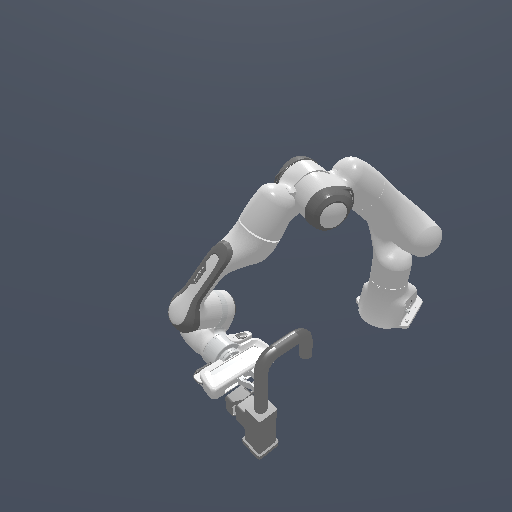

In [8]:
from PIL import Image
Image.fromarray(frames[-1])